# Predicting heart disease using machine learning
This notebook looks into using various python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes. we'll go through

1. Importing the Data File
2. Exploring Data
3. Modelling(Getting Data ready to be trained and then choosing the best Machine Learning model)
4. Model Tuning using GridSearchCV
5. Feature Importance
6. Conclusion



In [1]:
# importing all tools we need

#Data Analysis and plotting tools
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sklearn
import seaborn as sns
# for plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn(we have a classification problem)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# 1. Importing the Data file

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# 2. Exploring data

In [4]:
# Are there missing values ?
df.isna().sum()

# Absence of missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

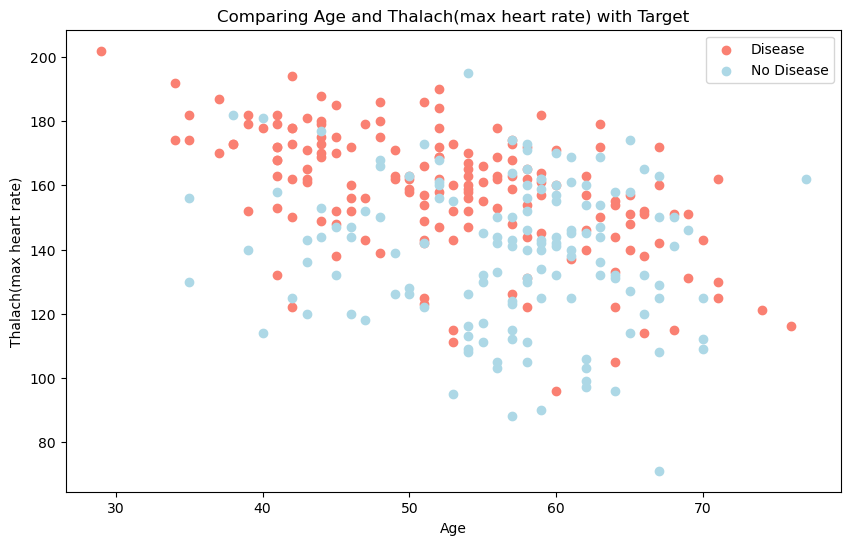

In [5]:
# comparing Age and Thalach(max heart rate) with Target


# create figure
plt.figure(figsize=(10,6))

#plot scatter with positive examples
plt.scatter(df['age'][df['target']==1],
            df['thalach'][df['target']==1],
            c='salmon');

#plot scatter with negative examples
plt.scatter(df['age'][df['target']==0],
            df['thalach'][df['target']==0],
            c='lightblue');

plt.title('Comparing Age and Thalach(max heart rate) with Target')
plt.xlabel('Age')
plt.ylabel('Thalach(max heart rate)')
plt.legend(['Disease','No Disease']);

# 3. Modelling

In [6]:
#initialising features(inputs) and target(output)

x= df.drop('target',axis=1) #this line of code takes all the columns(inputs) but drops 'target colum'
y=df['target'] #Now we set 'y' to be target column(outputs)

In [7]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [9]:
#Splitting the data into training and test sets
#setup random seed
np.random.seed(42) #for getting an accurate result everytime code is run(important)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2) 

we have a classification problem so from the estimator map we will try 3 models):
1. Logistic Regression
2. K-Nearest -neighbours Classifier
3. Random Forest Classifier

In [10]:
# put models in a dictionary
models= {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test , y_train, y_test):
    '''
    A function that fits and evaluates given machine learning models.
    '''
    #set random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores= {}
    # Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and append it's score to the model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [11]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

# logistic regression performed the best

C:\Users\Gaming\Desktop\stock_market_predict\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

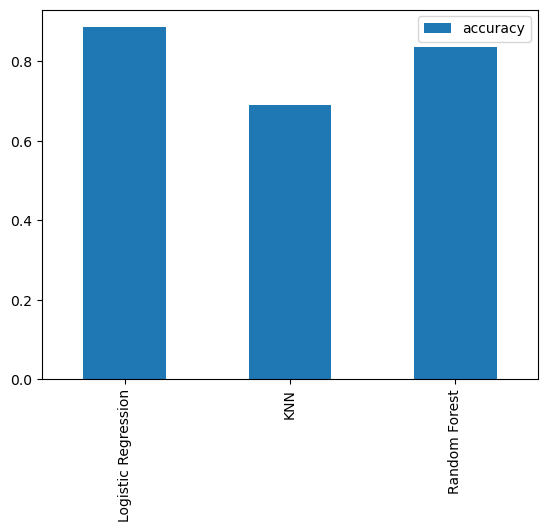

In [12]:
# plotting the models accuracy
model_compare= pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

# 4. Model Tuning
using GridSearchCV(tuning hyperparameters) to tune our Logistic regression model

In [15]:

np.random.seed(42)

model= LogisticRegression()
grid = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'solver': ['liblinear'],  # Optimization algorithm
   
}

# Implement GridSearchCV
gs_model = GridSearchCV(estimator=model,
                                param_grid=grid,
                                cv=5,  # 5-fold cross-validation
                                verbose=True, 
                                n_jobs=-1)  # Use all available cores

# Fit the model
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [16]:
#now let's check which combination was the best
gs_model.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [17]:
#let's evaluate based on the test samples
gs_model.score(x_test, y_test)
# note we got exactly thesame thing with when it wasn't tuned, Logistic Regression() is really good for classification problems

0.8852459016393442

# 5. Feature importance
Feature importance is another way of asking "which features contributed the most to the outcomes of the model and how did they contribute?"


Why Feature importance is helpful? it helps us to know which data/features are important therefore in the future we may remove the data/feature that had a neutral(0) or very little positive or negative effect on the target value in order to make it easier for our machine learning model to find more patterns thereby better accuracy

In [22]:
# Fit and instance of LogisticRegression
gs_model.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [23]:
gs_best_model= LogisticRegression(C=0.23357214690901212, solver= 'liblinear')
gs_best_model.fit(x_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [24]:
# check coef_ 
gs_best_model.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

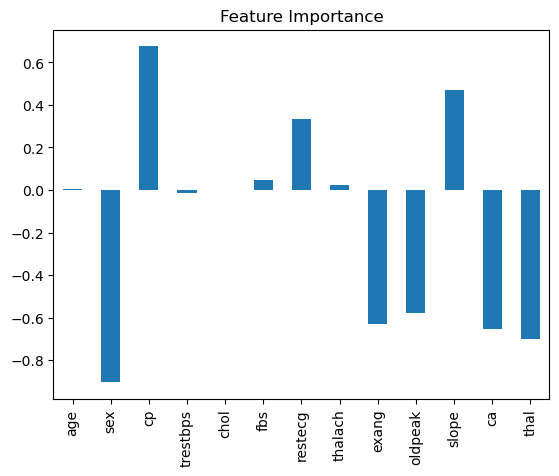

In [26]:
# Let's visualise it
feature_dict= dict(zip(df.columns, list(gs_best_model.coef_[0])))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title= 'Feature Importance', legend=False);

# now this explains how much each feature contributes to the target, some are negative, positive or neutral(0)
#brief explanation:

#from 'cp'(chest pain) we have a positive correlation which means as the value of chest pain goes up the target value goes up too

#using 'sex' we have a negative correlation which means as the value of sex increases, target value reduces

#if the value is close to 0 or 0 then there is no correlation/ effect

# 6. Conclusion
After experimentation, choosing machine learning model and Tuning model:
I came up with a machine Learning capable of predicting if a patient has heart disease or not with an accuracy of up to 86%